<a href="https://colab.research.google.com/github/Alaaibrahim2/Alaa/blob/main/CNN%2BRandomforest_and_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#@title Default title text
od.download('https://www.kaggle.com/competitions/digit-recognizer/overview')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alaaibrahim222
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:01<00:00, 15.9MB/s]



Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow import keras
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU, ReLU
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [4]:
train = pd.read_csv("/content/digit-recognizer/train.csv")
test = pd.read_csv("/content/digit-recognizer/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

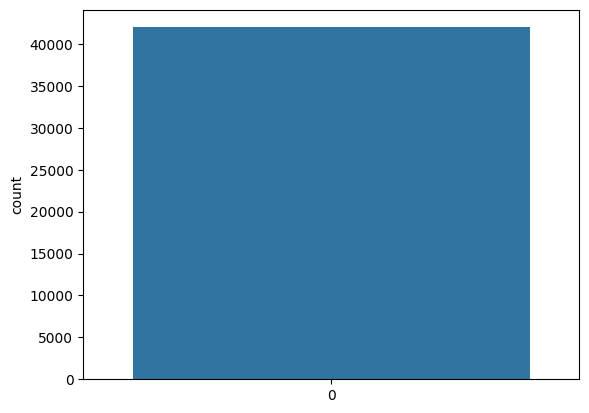

In [5]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [6]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
X_train = X_train / 255.0
test = test / 255.0

In [9]:
X_train_r = X_train.values.reshape(-1,28,28,1)
test_r = test.values.reshape(-1,28,28,1)

In [10]:
X_train = X_train.values
Y_train = Y_train.values
test = test.values

In [11]:
Y_train_keras = tf.keras.utils.to_categorical(Y_train, num_classes = 10)

In [12]:
X_train_keras, X_val_keras, Y_train_keras, Y_val_keras = train_test_split(X_train_r, Y_train_keras, test_size = 0.1, random_state=0)

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=0)

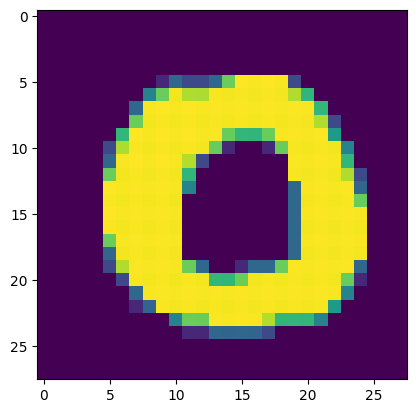

In [14]:
plt.imshow(X_train_keras[2])

In [15]:
model = models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [16]:
optimizer = Adam(lr=0.001)

In [17]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
tf.random.set_seed(0)

history = model.fit(X_train_keras,
                    Y_train_keras,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val_keras, Y_val_keras),
                   )

Epoch 1/10
296/296 [==============================] - 19s 14ms/step - loss: 0.2869 - accuracy: 0.9088 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 2/10
296/296 [==============================] - 3s 11ms/step - loss: 0.0876 - accuracy: 0.9739 - val_loss: 0.0588 - val_accuracy: 0.9829
Epoch 3/10
296/296 [==============================] - 3s 11ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0316 - val_accuracy: 0.9907
Epoch 4/10
296/296 [==============================] - 3s 12ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 5/10
296/296 [==============================] - 3s 12ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 6/10
296/296 [==============================] - 3s 11ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0271 - val_accuracy: 0.9919
Epoch 7/10
296/296 [==============================] - 3s 11ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0429 - val_accuracy: 0.988

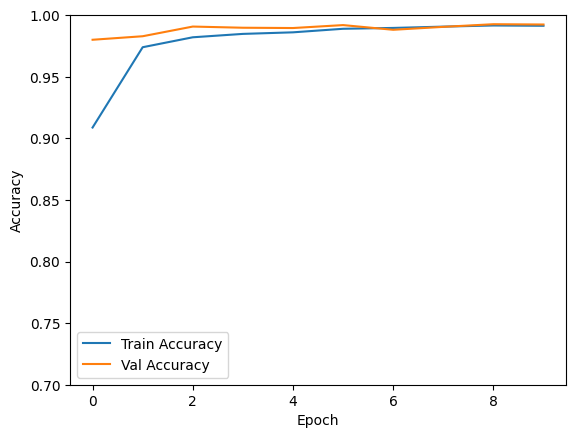

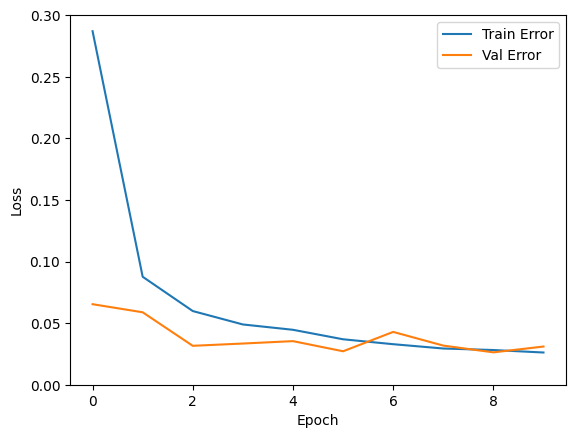

In [19]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
  plt.ylim([0.7,1.0])
  plt.legend()
  plt.show()
    
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0.0,0.3])
  plt.legend()
  plt.show()


plot_history(history)

In [20]:
pred = model.predict(test_r)

875/875 [==============================] - 4s 4ms/step


In [21]:
submission = pd.read_csv("/content/digit-recognizer/sample_submission.csv")

In [22]:
submission["Label"] = pred
submission.to_csv("submission_keras.csv",index=False)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [24]:
rf = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 1000, random_state = 0, verbose = 1)

In [25]:
rf.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.7min finished


RandomForestClassifier(min_samples_leaf=2, n_estimators=1000, random_state=0,
                       verbose=1)

In [26]:
rf_pred = rf.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.4s finished


In [27]:
print('RandomForest : ' + str(accuracy_score(rf_pred, Y_val)))

RandomForest : 0.9611904761904762
